# Creating UML diagrams with PlantUML

PlantUML is a tool to create UML-diagrams using plain text.
See: https://plantuml.com/

In this notebook we use python libraries to create PlantUML diagrams. 

PlantUML provides a 'diagram as code' solution. This means that with text/code as input, an UML-diagram can be created. 
So, of an UML can have two representations:
- the code (or txt.file)
- the diagram



### Contents:
- O. Install libraries
- 1. Py2PUML
- 2. IPlantUML
- 3. Converting a XML file to a UML Class diagram
- 4. Turning a JSON object into a diagram

N.B. Another popular library for python is 'plantuml', however this one does not work under IPython / Jupyter

## 0. Install libraries

In [16]:
#pylint is a dependency
!pip install pylint

In [6]:
!pip install plantuml

## 1. Py2PUML 
Python to PlantUML
source:https://pypi.org/project/py2puml/

In [2]:
!pip install py2puml

In [23]:
!py2puml py2puml/domain py2puml.domain

@startuml
@enduml



In [19]:
from py2puml.py2puml import py2puml

# outputs the PlantUML content in the terminal
print(''.join(
    py2puml('py2puml/domain', 'py2puml.domain')
))

# writes the PlantUML content in a file
with open('py2puml/py2puml.domain.puml', 'w') as puml_file:
    puml_file.writelines(py2puml('py2puml/domain', 'py2puml.domain'))

@startuml
@enduml



FileNotFoundError: [Errno 2] No such file or directory: 'py2puml/py2puml.domain.puml'

UsageError: Cell magic `%%plantuml` not found.


## 2. IPlantUML

- Pypi.org: https://pypi.org/project/IPlantUML/
- GitHub: https://github.com/jbn/iplantuml
- more info: https://pythonhosted.org/plantuml/

Please be aware that with cells with %%plantuml you cannot use comments with #

In [10]:
!pip install iplantuml

In [2]:
import iplantuml

In [17]:
!mkdir UML

A subdirectory or file UML already exists.


In [18]:
cd UML

C:\Users\31653\Documents\GitHub\Notebooks\UML


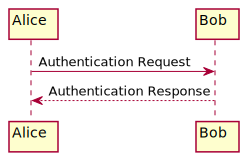

In [5]:
%%plantuml -n 'dummy'

@startuml
Alice -> Bob: Authentication Request
Bob --> Alice: Authentication Response
@enduml

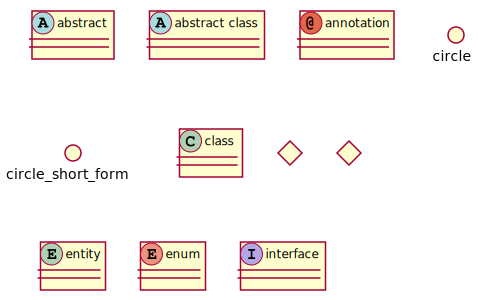

In [4]:
%%plantuml 
@startuml
abstract        abstract
abstract class  "abstract class"
annotation      annotation
circle          circle
()              circle_short_form
class           class
diamond         diamond
<>              diamond_short_form
entity          entity
enum            enum
interface       interface
@enduml

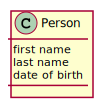

In [29]:
%%plantuml
@startuml
class Person{ 
first name
last name
date of birth
}
@enduml

## 3. Converting a xml file to a PlantUML class diagram

In [3]:
import iplantuml
import glob
my_xmls=glob.glob('*.xml')
my_xmls

['haarcascade_frontalface_default.xml',
 'haar_cascade_stop.xml',
 'movies.xml',
 'simple.xml']

In [8]:
import xml.etree.ElementTree as ET #import the library 
tree = ET.parse('movies.xml') #parse the XML
ET.dump(tree) #print the xml file

<collection>
    <genre category="Action">
        <decade years="1980s">
            <movie favorite="True" title="Indiana Jones: The raiders of the lost Ark">
                <format multiple="No">DVD</format>
                <year>1981</year>
                <rating>PG</rating>
                <description>
                'Archaeologist and adventurer Indiana Jones 
                is hired by the U.S. government to find the Ark of the 
                Covenant before the Nazis.'
                </description>
            </movie>
               <movie favorite="True" title="THE KARATE KID">
               <format multiple="Yes">DVD,Online</format>
               <year>1984</year>
               <rating>PG</rating>
               <description>None provided.</description>
            </movie>
            <movie favorite="False" title="Back 2 the Future">
               <format multiple="False">Blu-ray</format>
               <year>1985</year>
               <rating>PG</rating>
     

In [9]:
my_list =[]
for elem in tree.iter():
    my_list.append(elem.tag)
#remove duplicates by converting it to a dict and back to a list
#source: https://www.w3schools.com/python/python_howto_remove_duplicates.asp
my_clean_list = list(dict.fromkeys(my_list))
#print(my_clean_list)
for i in range (len(my_clean_list)):
        print(my_clean_list[i])

collection
genre
decade
movie
format
year
rating
description


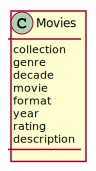

In [4]:
%%plantuml
@startuml
class Movies{
collection
genre
decade
movie
format
year
rating
description
}
@enduml

In [10]:
#create the plantuml text file
class_name = 'movie' #enter class name
textfile = open("plantuml.txt", "w")
textfile.write('@startuml\n')
textfile.write('class '+class_name + '{\n')
for element in my_clean_list:
    textfile.write(element + "\n")
textfile.write('}\n')
textfile.write('@enduml')
textfile.close()                   

In [13]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\plantuml.txt

In [11]:
#convert the txt file to an .png image using plantuml
!python -m plantuml plantuml.txt

[{'filename': 'plantuml.txt', 'gen_success': True}]


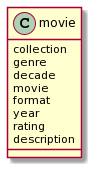

In [12]:
#show the generated png
from IPython import display
display.Image(filename="plantuml.png", width=100, height=100)

## 4. Turning a JSON object into a diagram

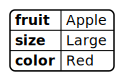

In [22]:
%%plantuml
@startjson
{
   "fruit":"Apple",
   "size":"Large",
   "color":"Red"
}
@endjson

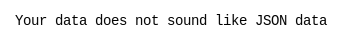

In [8]:
%%plantuml
@startjson
{'schemas': {'Order': {'type': 'object',
   'properties': {'id': {'type': 'integer', 'format': 'int64', 'example': 10},
    'petId': {'type': 'integer', 'format': 'int64', 'example': 198772},
    'quantity': {'type': 'integer', 'format': 'int32', 'example': 7},
    'shipDate': {'type': 'string', 'format': 'date-time'},
    'status': {'type': 'string',
     'description': 'Order Status',
     'example': 'approved',
     'enum': ['placed', 'approved', 'delivered']},
    'complete': {'type': 'boolean'}},
   'xml': {'name': 'order'}},
  'Customer': {'type': 'object',
   'properties': {'id': {'type': 'integer',
     'format': 'int64',
     'example': 100000},
    'username': {'type': 'string', 'example': 'fehguy'},
    'address': {'type': 'array',
     'xml': {'name': 'addresses', 'wrapped': True},
     'items': {'$ref': '#/components/schemas/Address'}}},
   'xml': {'name': 'customer'}},
  'Address': {'type': 'object',
   'properties': {'street': {'type': 'string', 'example': '437 Lytton'},
    'city': {'type': 'string', 'example': 'Palo Alto'},
    'state': {'type': 'string', 'example': 'CA'},
    'zip': {'type': 'string', 'example': '94301'}},
   'xml': {'name': 'address'}},
  'Category': {'type': 'object',
   'properties': {'id': {'type': 'integer', 'format': 'int64', 'example': 1},
    'name': {'type': 'string', 'example': 'Dogs'}},
   'xml': {'name': 'category'}},
  'User': {'type': 'object',
   'properties': {'id': {'type': 'integer', 'format': 'int64', 'example': 10},
    'username': {'type': 'string', 'example': 'theUser'},
    'firstName': {'type': 'string', 'example': 'John'},
    'lastName': {'type': 'string', 'example': 'James'},
    'email': {'type': 'string', 'example': 'john@email.com'},
    'password': {'type': 'string', 'example': '12345'},
    'phone': {'type': 'string', 'example': '12345'},
    'userStatus': {'type': 'integer',
     'description': 'User Status',
     'format': 'int32',
     'example': 1}},
   'xml': {'name': 'user'}},
  'Tag': {'type': 'object',
   'properties': {'id': {'type': 'integer', 'format': 'int64'},
    'name': {'type': 'string'}},
   'xml': {'name': 'tag'}},
  'Pet': {'required': ['name', 'photoUrls'],
   'type': 'object',
   'properties': {'id': {'type': 'integer', 'format': 'int64', 'example': 10},
    'name': {'type': 'string', 'example': 'doggie'},
    'category': {'$ref': '#/components/schemas/Category'},
    'photoUrls': {'type': 'array',
     'xml': {'wrapped': True},
     'items': {'type': 'string', 'xml': {'name': 'photoUrl'}}},
    'tags': {'type': 'array',
     'xml': {'wrapped': True},
     'items': {'$ref': '#/components/schemas/Tag'}},
    'status': {'type': 'string',
     'description': 'pet status in the store',
     'enum': ['available', 'pending', 'sold']}},
   'xml': {'name': 'pet'}},
  'ApiResponse': {'type': 'object',
   'properties': {'code': {'type': 'integer', 'format': 'int32'},
    'type': {'type': 'string'},
    'message': {'type': 'string'}},
   'xml': {'name': '##default'}}},
 'requestBodies': {'Pet': {'description': 'Pet object that needs to be added to the store',
   'content': {'application/json': {'schema': {'$ref': '#/components/schemas/Pet'}},
    'application/xml': {'schema': {'$ref': '#/components/schemas/Pet'}}}},
  'UserArray': {'description': 'List of user object',
   'content': {'application/json': {'schema': {'type': 'array',
      'items': {'$ref': '#/components/schemas/User'}}}}}},
 'securitySchemes': {'petstore_auth': {'type': 'oauth2',
   'flows': {'implicit': {'authorizationUrl': 'https://petstore3.swagger.io/oauth/authorize',
     'scopes': {'write:pets': 'modify pets in your account',
      'read:pets': 'read your pets'}}}},
  'api_key': {'type': 'apiKey', 'name': 'api_key', 'in': 'header'}}}
@endjson

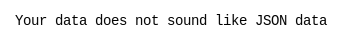

In [9]:
%%plantuml
@startjson
{'Order': {'type': 'object',
  'properties': {'id': {'type': 'integer', 'format': 'int64', 'example': 10},
   'petId': {'type': 'integer', 'format': 'int64', 'example': 198772},
   'quantity': {'type': 'integer', 'format': 'int32', 'example': 7},
   'shipDate': {'type': 'string', 'format': 'date-time'},
   'status': {'type': 'string',
    'description': 'Order Status',
    'example': 'approved',
    'enum': ['placed', 'approved', 'delivered']},
   'complete': {'type': 'boolean'}},
  'xml': {'name': 'order'}},
 'Customer': {'type': 'object',
  'properties': {'id': {'type': 'integer',
    'format': 'int64',
    'example': 100000},
   'username': {'type': 'string', 'example': 'fehguy'},
   'address': {'type': 'array',
    'xml': {'name': 'addresses', 'wrapped': True},
    'items': {'$ref': '#/components/schemas/Address'}}},
  'xml': {'name': 'customer'}},
 'Address': {'type': 'object',
  'properties': {'street': {'type': 'string', 'example': '437 Lytton'},
   'city': {'type': 'string', 'example': 'Palo Alto'},
   'state': {'type': 'string', 'example': 'CA'},
   'zip': {'type': 'string', 'example': '94301'}},
  'xml': {'name': 'address'}},
 'Category': {'type': 'object',
  'properties': {'id': {'type': 'integer', 'format': 'int64', 'example': 1},
   'name': {'type': 'string', 'example': 'Dogs'}},
  'xml': {'name': 'category'}},
 'User': {'type': 'object',
  'properties': {'id': {'type': 'integer', 'format': 'int64', 'example': 10},
   'username': {'type': 'string', 'example': 'theUser'},
   'firstName': {'type': 'string', 'example': 'John'},
   'lastName': {'type': 'string', 'example': 'James'},
   'email': {'type': 'string', 'example': 'john@email.com'},
   'password': {'type': 'string', 'example': '12345'},
   'phone': {'type': 'string', 'example': '12345'},
   'userStatus': {'type': 'integer',
    'description': 'User Status',
    'format': 'int32',
    'example': 1}},
  'xml': {'name': 'user'}},
 'Tag': {'type': 'object',
  'properties': {'id': {'type': 'integer', 'format': 'int64'},
   'name': {'type': 'string'}},
  'xml': {'name': 'tag'}},
 'Pet': {'required': ['name', 'photoUrls'],
  'type': 'object',
  'properties': {'id': {'type': 'integer', 'format': 'int64', 'example': 10},
   'name': {'type': 'string', 'example': 'doggie'},
   'category': {'$ref': '#/components/schemas/Category'},
   'photoUrls': {'type': 'array',
    'xml': {'wrapped': True},
    'items': {'type': 'string', 'xml': {'name': 'photoUrl'}}},
   'tags': {'type': 'array',
    'xml': {'wrapped': True},
    'items': {'$ref': '#/components/schemas/Tag'}},
   'status': {'type': 'string',
    'description': 'pet status in the store',
    'enum': ['available', 'pending', 'sold']}},
  'xml': {'name': 'pet'}},
 'ApiResponse': {'type': 'object',
  'properties': {'code': {'type': 'integer', 'format': 'int32'},
   'type': {'type': 'string'},
   'message': {'type': 'string'}},
  'xml': {'name': '##default'}}}
@endjson


In [2]:
import iplantuml

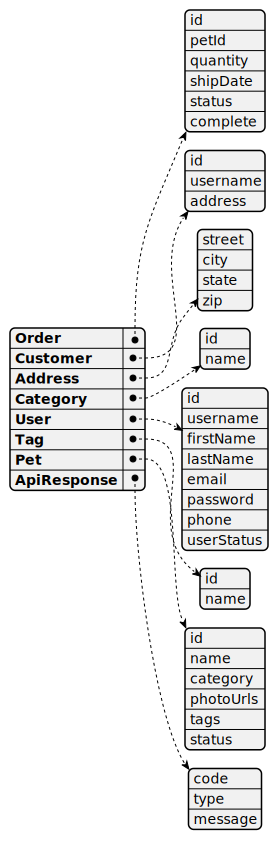

In [10]:
%%plantuml
@startjson
{
    "Order": [
        "id",
        "petId",
        "quantity",
        "shipDate",
        "status",
        "complete"
    ],
    "Customer": [
        "id",
        "username",
        "address"
    ],
    "Address": [
        "street",
        "city",
        "state",
        "zip"
    ],
    "Category": [
        "id",
        "name"
    ],
    "User": [
        "id",
        "username",
        "firstName",
        "lastName",
        "email",
        "password",
        "phone",
        "userStatus"
    ],
    "Tag": [
        "id",
        "name"
    ],
    "Pet": [
        "id",
        "name",
        "category",
        "photoUrls",
        "tags",
        "status"
    ],
    "ApiResponse": [
        "code",
        "type",
        "message"
    ]
}
@endjson

## JSON to Class Diagram

### Simple json

In [8]:
my_json =  {
    "Order": [
        "id",
        "petId",
        "quantity",
        "shipDate",
        "status",
        "complete"
    ]
}

In [17]:
#split in key value pairs
for key, value in my_json.items():
    my_key = key
    my_value = value
    print(key, '=', value)
    print(my_key)
    print(my_value)

Order = ['id', 'petId', 'quantity', 'shipDate', 'status', 'complete']
Order
['id', 'petId', 'quantity', 'shipDate', 'status', 'complete']


In [18]:
#create the plantuml text file
class_name = my_key #enter class name
textfile = open("plantuml.txt", "w")
textfile.write('@startuml\n')
textfile.write('class '+class_name + '{\n')
for element in my_value:
    textfile.write(element + "\n")
textfile.write('}\n')
textfile.write('@enduml')
textfile.close()   

In [29]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\plantuml.txt

### More complex json

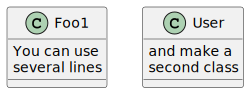

In [21]:
%%plantuml
@startuml
class Foo1 {
You can use
several lines
}
class User {
and make a
second class  
}
@enduml

In [1]:
my_json2 ={
    "Order": [
        "id",
        "petId",
        "quantity",
        "shipDate",
        "status",
        "complete"
    ],
    "Customer": [
        "id",
        "username",
        "address"
    ],
    "Address": [
        "street",
        "city",
        "state",
        "zip"
    ],
    "Category": [
        "id",
        "name"
    ],
    "User": [
        "id",
        "username",
        "firstName",
        "lastName",
        "email",
        "password",
        "phone",
        "userStatus"
    ],
    "Tag": [
        "id",
        "name"
    ],
    "Pet": [
        "id",
        "name",
        "category",
        "photoUrls",
        "tags",
        "status"
    ],
    "ApiResponse": [
        "code",
        "type",
        "message"
    ]
}

In [2]:
type(my_json2)

dict

In [60]:
textfile = open("plantuml_complex2.txt", "w")
textfile.write('@startuml\n')
for key, value in my_json2.items():
    textfile.write('class '+str(key) +'{\n')
    for i in range (len(value)):
        textfile.write(value[i] + "\n")
    textfile.write('}\n')
textfile.write('}\n')
textfile.write('@enduml')
textfile.close()  

In [64]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\plantuml_complex2.txt

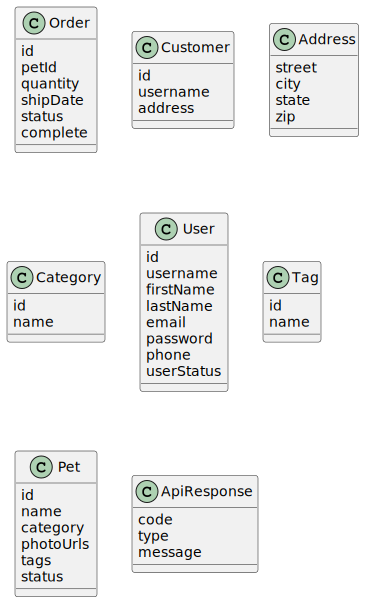

In [63]:
%%plantuml
@startuml
class Order{
id
petId
quantity
shipDate
status
complete
}
class Customer{
id
username
address
}
class Address{
street
city
state
zip
}
class Category{
id
name
}
class User{
id
username
firstName
lastName
email
password
phone
userStatus
}
class Tag{
id
name
}
class Pet{
id
name
category
photoUrls
tags
status
}
class ApiResponse{
code
type
message
}
@enduml

In [3]:
import iplantuml

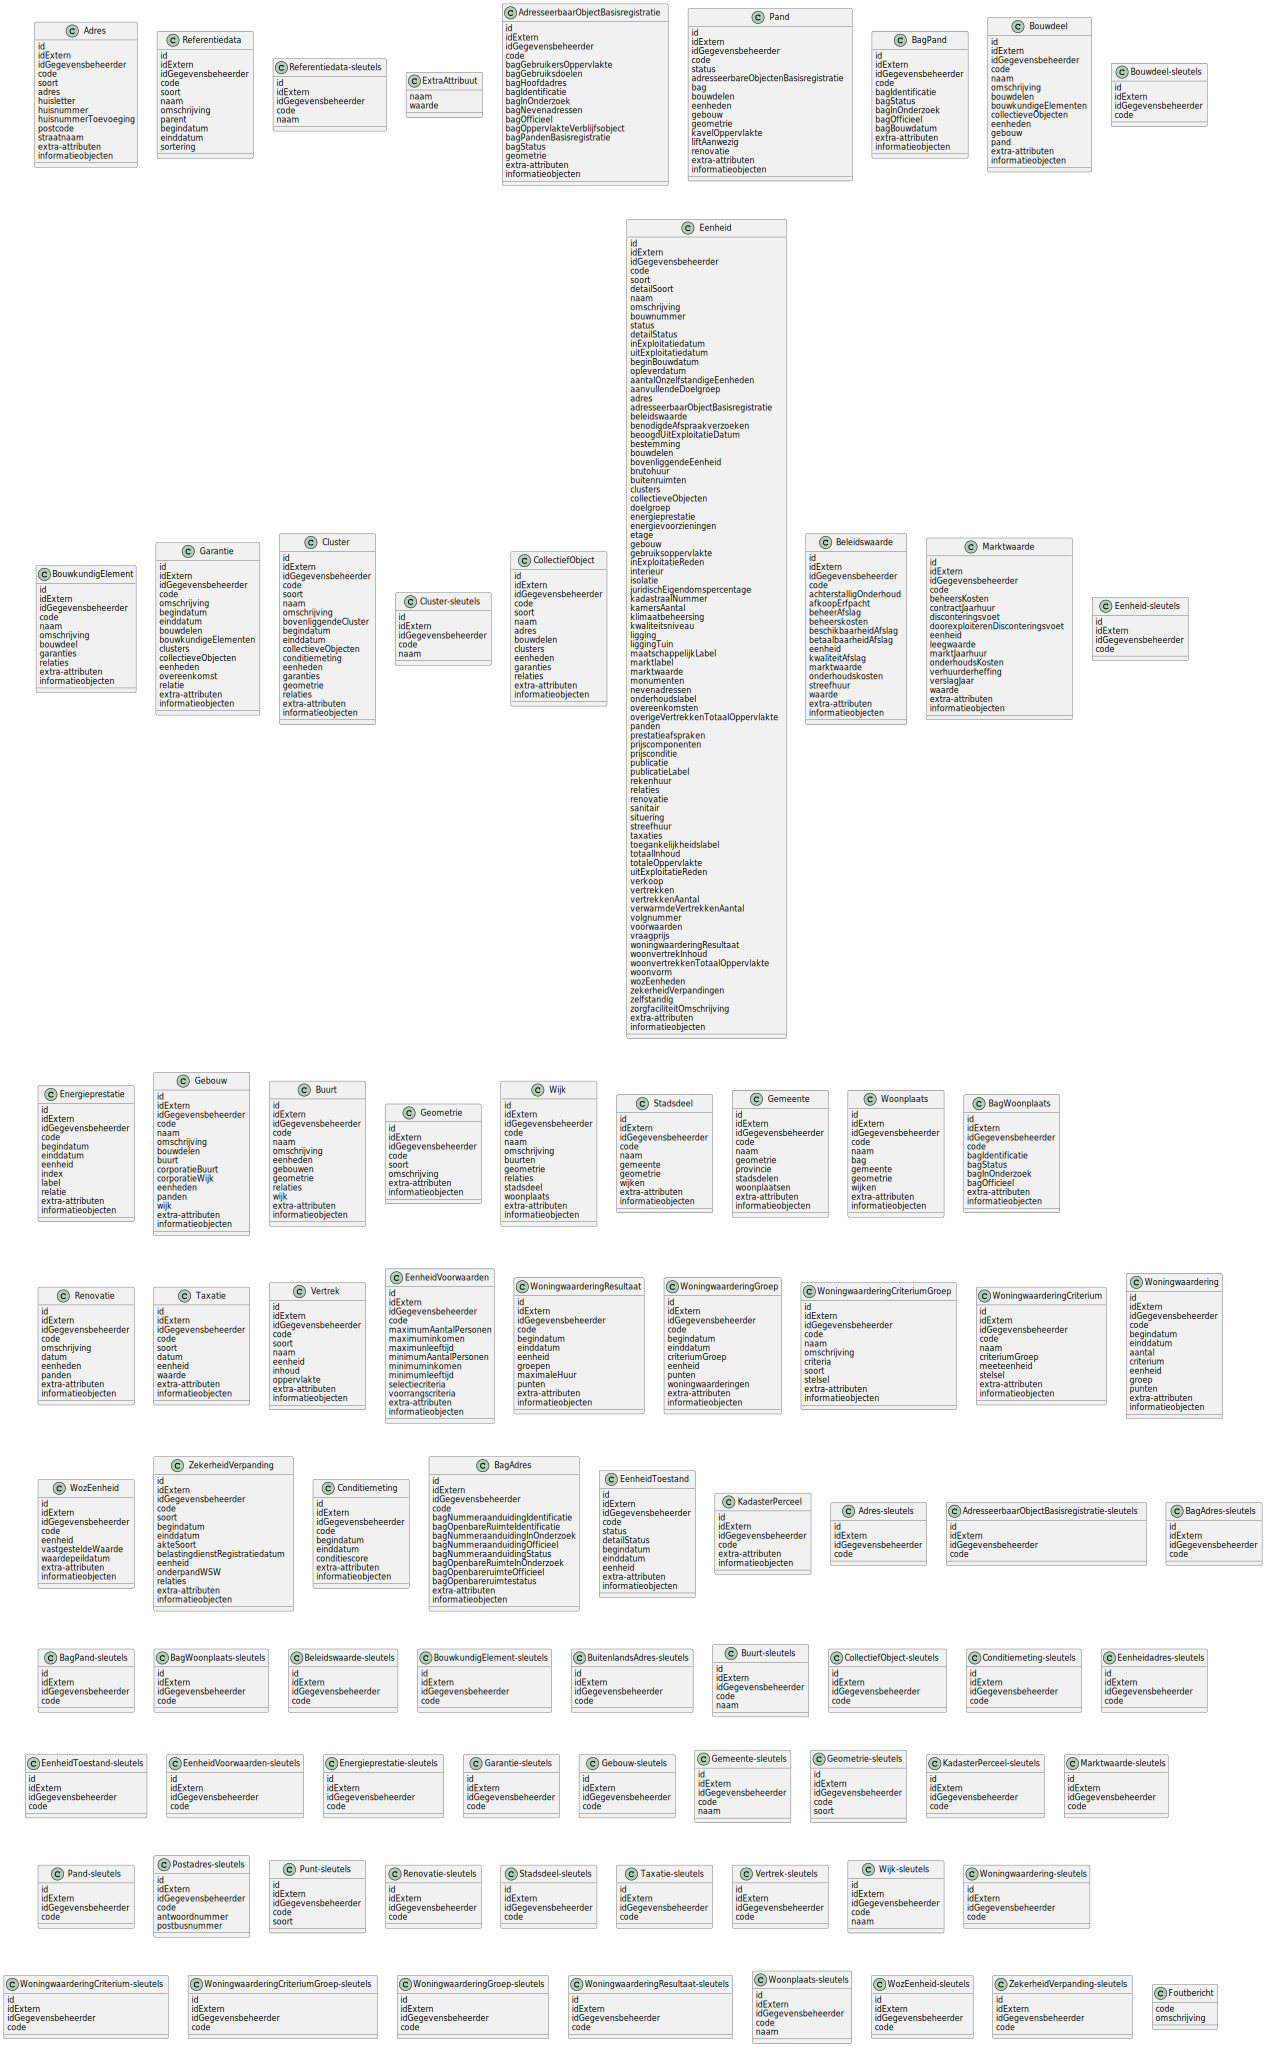

In [4]:
%%plantuml
@startuml
class Adres{
id
idExtern
idGegevensbeheerder
code
soort
adres
huisletter
huisnummer
huisnummerToevoeging
postcode
straatnaam
extra-attributen
informatieobjecten
}
class Referentiedata{
id
idExtern
idGegevensbeheerder
code
soort
naam
omschrijving
parent
begindatum
einddatum
sortering
}
class Referentiedata-sleutels{
id
idExtern
idGegevensbeheerder
code
naam
}
class ExtraAttribuut{
naam
waarde
}
class AdresseerbaarObjectBasisregistratie{
id
idExtern
idGegevensbeheerder
code
bagGebruikersOppervlakte
bagGebruiksdoelen
bagHoofdadres
bagIdentificatie
bagInOnderzoek
bagNevenadressen
bagOfficieel
bagOppervlakteVerblijfsobject
bagPandenBasisregistratie
bagStatus
geometrie
extra-attributen
informatieobjecten
}
class Pand{
id
idExtern
idGegevensbeheerder
code
status
adresseerbareObjectenBasisregistratie
bag
bouwdelen
eenheden
gebouw
geometrie
kavelOppervlakte
liftAanwezig
renovatie
extra-attributen
informatieobjecten
}
class BagPand{
id
idExtern
idGegevensbeheerder
code
bagIdentificatie
bagStatus
bagInOnderzoek
bagOfficieel
bagBouwdatum
extra-attributen
informatieobjecten
}
class Bouwdeel{
id
idExtern
idGegevensbeheerder
code
naam
omschrijving
bouwdelen
bouwkundigeElementen
collectieveObjecten
eenheden
gebouw
pand
extra-attributen
informatieobjecten
}
class Bouwdeel-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class BouwkundigElement{
id
idExtern
idGegevensbeheerder
code
naam
omschrijving
bouwdeel
garanties
relaties
extra-attributen
informatieobjecten
}
class Garantie{
id
idExtern
idGegevensbeheerder
code
omschrijving
begindatum
einddatum
bouwdelen
bouwkundigeElementen
clusters
collectieveObjecten
eenheden
overeenkomst
relatie
extra-attributen
informatieobjecten
}
class Cluster{
id
idExtern
idGegevensbeheerder
code
soort
naam
omschrijving
bovenliggendeCluster
begindatum
einddatum
collectieveObjecten
conditiemeting
eenheden
garanties
geometrie
relaties
extra-attributen
informatieobjecten
}
class Cluster-sleutels{
id
idExtern
idGegevensbeheerder
code
naam
}
class CollectiefObject{
id
idExtern
idGegevensbeheerder
code
soort
naam
adres
bouwdelen
clusters
eenheden
garanties
relaties
extra-attributen
informatieobjecten
}
class Eenheid{
id
idExtern
idGegevensbeheerder
code
soort
detailSoort
naam
omschrijving
bouwnummer
status
detailStatus
inExploitatiedatum
uitExploitatiedatum
beginBouwdatum
opleverdatum
aantalOnzelfstandigeEenheden
aanvullendeDoelgroep
adres
adresseerbaarObjectBasisregistratie
beleidswaarde
benodigdeAfspraakverzoeken
beoogdUitExploitatieDatum
bestemming
bouwdelen
bovenliggendeEenheid
brutohuur
buitenruimten
clusters
collectieveObjecten
doelgroep
energieprestatie
energievoorzieningen
etage
gebouw
gebruiksoppervlakte
inExploitatieReden
interieur
isolatie
juridischEigendomspercentage
kadastraalNummer
kamersAantal
klimaatbeheersing
kwaliteitsniveau
ligging
liggingTuin
maatschappelijkLabel
marktlabel
marktwaarde
monumenten
nevenadressen
onderhoudslabel
overeenkomsten
overigeVertrekkenTotaalOppervlakte
panden
prestatieafspraken
prijscomponenten
prijsconditie
publicatie
publicatieLabel
rekenhuur
relaties
renovatie
sanitair
situering
streefhuur
taxaties
toegankelijkheidslabel
totaalInhoud
totaleOppervlakte
uitExploitatieReden
verkoop
vertrekken
vertrekkenAantal
verwarmdeVertrekkenAantal
volgnummer
voorwaarden
vraagprijs
woningwaarderingResultaat
woonvertrekInhoud
woonvertrekkenTotaalOppervlakte
woonvorm
wozEenheden
zekerheidVerpandingen
zelfstandig
zorgfaciliteitOmschrijving
extra-attributen
informatieobjecten
}
class Beleidswaarde{
id
idExtern
idGegevensbeheerder
code
achterstalligOnderhoud
afkoopErfpacht
beheerAfslag
beheerskosten
beschikbaarheidAfslag
betaalbaarheidAfslag
eenheid
kwaliteitAfslag
marktwaarde
onderhoudskosten
streefhuur
waarde
extra-attributen
informatieobjecten
}
class Marktwaarde{
id
idExtern
idGegevensbeheerder
code
beheersKosten
contractJaarhuur
disconteringsvoet
doorexploiterenDisconteringsvoet
eenheid
leegwaarde
marktJaarhuur
onderhoudsKosten
verhuurderheffing
verslagJaar
waarde
extra-attributen
informatieobjecten
}
class Eenheid-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Energieprestatie{
id
idExtern
idGegevensbeheerder
code
begindatum
einddatum
eenheid
index
label
relatie
extra-attributen
informatieobjecten
}
class Gebouw{
id
idExtern
idGegevensbeheerder
code
naam
omschrijving
bouwdelen
buurt
corporatieBuurt
corporatieWijk
eenheden
panden
wijk
extra-attributen
informatieobjecten
}
class Buurt{
id
idExtern
idGegevensbeheerder
code
naam
omschrijving
eenheden
gebouwen
geometrie
relaties
wijk
extra-attributen
informatieobjecten
}
class Geometrie{
id
idExtern
idGegevensbeheerder
code
soort
omschrijving
extra-attributen
informatieobjecten
}
class Wijk{
id
idExtern
idGegevensbeheerder
code
naam
omschrijving
buurten
geometrie
relaties
stadsdeel
woonplaats
extra-attributen
informatieobjecten
}
class Stadsdeel{
id
idExtern
idGegevensbeheerder
code
naam
gemeente
geometrie
wijken
extra-attributen
informatieobjecten
}
class Gemeente{
id
idExtern
idGegevensbeheerder
code
naam
geometrie
provincie
stadsdelen
woonplaatsen
extra-attributen
informatieobjecten
}
class Woonplaats{
id
idExtern
idGegevensbeheerder
code
naam
bag
gemeente
geometrie
wijken
extra-attributen
informatieobjecten
}
class BagWoonplaats{
id
idExtern
idGegevensbeheerder
code
bagIdentificatie
bagStatus
bagInOnderzoek
bagOfficieel
extra-attributen
informatieobjecten
}
class Renovatie{
id
idExtern
idGegevensbeheerder
code
omschrijving
datum
eenheden
panden
extra-attributen
informatieobjecten
}
class Taxatie{
id
idExtern
idGegevensbeheerder
code
soort
datum
eenheid
waarde
extra-attributen
informatieobjecten
}
class Vertrek{
id
idExtern
idGegevensbeheerder
code
soort
naam
eenheid
inhoud
oppervlakte
extra-attributen
informatieobjecten
}
class EenheidVoorwaarden{
id
idExtern
idGegevensbeheerder
code
maximumAantalPersonen
maximuminkomen
maximunleeftijd
minimumAantalPersonen
minimuminkomen
minimumleeftijd
selectiecriteria
voorrangscriteria
extra-attributen
informatieobjecten
}
class WoningwaarderingResultaat{
id
idExtern
idGegevensbeheerder
code
begindatum
einddatum
eenheid
groepen
maximaleHuur
punten
extra-attributen
informatieobjecten
}
class WoningwaarderingGroep{
id
idExtern
idGegevensbeheerder
code
begindatum
einddatum
criteriumGroep
eenheid
punten
woningwaarderingen
extra-attributen
informatieobjecten
}
class WoningwaarderingCriteriumGroep{
id
idExtern
idGegevensbeheerder
code
naam
omschrijving
criteria
soort
stelsel
extra-attributen
informatieobjecten
}
class WoningwaarderingCriterium{
id
idExtern
idGegevensbeheerder
code
naam
criteriumGroep
meeteenheid
stelsel
extra-attributen
informatieobjecten
}
class Woningwaardering{
id
idExtern
idGegevensbeheerder
code
begindatum
einddatum
aantal
criterium
eenheid
groep
punten
extra-attributen
informatieobjecten
}
class WozEenheid{
id
idExtern
idGegevensbeheerder
code
eenheid
vastgesteldeWaarde
waardepeildatum
extra-attributen
informatieobjecten
}
class ZekerheidVerpanding{
id
idExtern
idGegevensbeheerder
code
soort
begindatum
einddatum
akteSoort
belastingdienstRegistratiedatum
eenheid
onderpandWSW
relaties
extra-attributen
informatieobjecten
}
class Conditiemeting{
id
idExtern
idGegevensbeheerder
code
begindatum
einddatum
conditiescore
extra-attributen
informatieobjecten
}
class BagAdres{
id
idExtern
idGegevensbeheerder
code
bagNummeraanduidingIdentificatie
bagOpenbareRuimteIdentificatie
bagNummeraanduidingInOnderzoek
bagNummeraanduidingOfficieel
bagNummeraanduidingStatus
bagOpenbareRuimteInOnderzoek
bagOpenbareruimteOfficieel
bagOpenbareruimtestatus
extra-attributen
informatieobjecten
}
class EenheidToestand{
id
idExtern
idGegevensbeheerder
code
status
detailStatus
begindatum
einddatum
eenheid
extra-attributen
informatieobjecten
}
class KadasterPerceel{
id
idExtern
idGegevensbeheerder
code
extra-attributen
informatieobjecten
}
class Adres-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class AdresseerbaarObjectBasisregistratie-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class BagAdres-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class BagPand-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class BagWoonplaats-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Beleidswaarde-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class BouwkundigElement-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class BuitenlandsAdres-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Buurt-sleutels{
id
idExtern
idGegevensbeheerder
code
naam
}
class CollectiefObject-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Conditiemeting-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Eenheidadres-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class EenheidToestand-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class EenheidVoorwaarden-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Energieprestatie-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Garantie-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Gebouw-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Gemeente-sleutels{
id
idExtern
idGegevensbeheerder
code
naam
}
class Geometrie-sleutels{
id
idExtern
idGegevensbeheerder
code
soort
}
class KadasterPerceel-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Marktwaarde-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Pand-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Postadres-sleutels{
id
idExtern
idGegevensbeheerder
code
antwoordnummer
postbusnummer
}
class Punt-sleutels{
id
idExtern
idGegevensbeheerder
code
soort
}
class Renovatie-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Stadsdeel-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Taxatie-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Vertrek-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Wijk-sleutels{
id
idExtern
idGegevensbeheerder
code
naam
}
class Woningwaardering-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class WoningwaarderingCriterium-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class WoningwaarderingCriteriumGroep-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class WoningwaarderingGroep-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class WoningwaarderingResultaat-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Woonplaats-sleutels{
id
idExtern
idGegevensbeheerder
code
naam
}
class WozEenheid-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class ZekerheidVerpanding-sleutels{
id
idExtern
idGegevensbeheerder
code
}
class Foutbericht{
code
omschrijving
}
@enduml